### This notebook will be used for Capstone Project predicting the Accident Severity


In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course !')

Hello Capstone Project Course !


In [3]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline
import matplotlib as mtplt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Read data from csv file

In [4]:
df=pd.read_csv('Data-Collisions.csv',low_memory=False)

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0.0,0.0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0.0,0.0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0.0,0.0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0.0,0.0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0.0,0.0,N


###  

#### Checking the Columns (Features) data type and the number of null/non-null values and total number of rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65691 entries, 0 to 65690
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEVERITYCODE    65691 non-null  int64  
 1   X               63971 non-null  float64
 2   Y               63971 non-null  float64
 3   OBJECTID        65691 non-null  int64  
 4   INCKEY          65691 non-null  int64  
 5   COLDETKEY       65691 non-null  int64  
 6   REPORTNO        65691 non-null  object 
 7   STATUS          65691 non-null  object 
 8   ADDRTYPE        65299 non-null  object 
 9   INTKEY          20571 non-null  float64
 10  LOCATION        64968 non-null  object 
 11  EXCEPTRSNCODE   2687 non-null   object 
 12  EXCEPTRSNDESC   482 non-null    object 
 13  SEVERITYCODE.1  65691 non-null  int64  
 14  SEVERITYDESC    65691 non-null  object 
 15  COLLISIONTYPE   65553 non-null  object 
 16  PERSONCOUNT     65691 non-null  int64  
 17  PEDCOUNT        65691 non-null 

#### There are total 65691 rows and 38 columns with SEVERITYCODE.1 being repeated for SEVERITYCODE. Many columns have too many null values

###  

In [7]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,65691.000000,63971.000000,63971.000000,65691.000000,65691.000000,65691.000000,20571.000000,65691.000000,65691.000000,65691.000000,65691.000000,65691.000000,65690.000000,6.384400e+04,65690.000000,65690.00000
mean,1.289142,-122.330857,47.620716,37305.743709,56617.993256,56630.809700,34577.078266,1.289142,2.513419,0.031207,0.020246,1.979510,14.267940,6.045792e+06,94.310824,3513.15048
std,0.453367,0.030139,0.055333,20459.153633,34420.523445,34512.104656,36880.942740,0.453367,1.302765,0.181670,0.141920,0.539397,6.000232,1.334186e+06,1524.483893,42961.55793
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.137016e+06,0.000000,0.00000
25%,1.000000,-122.349751,47.578771,20484.500000,36528.500000,36528.500000,28651.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,5.110022e+06,0.000000,0.00000
50%,1.000000,-122.330631,47.617131,37811.000000,53869.000000,53869.000000,29942.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,6.118034e+06,0.000000,0.00000
75%,2.000000,-122.312003,47.664004,54892.500000,71006.500000,71006.500000,33564.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,7.150010e+06,0.000000,0.00000
max,2.000000,-122.238949,47.734136,71981.000000,331200.000000,332700.000000,615985.000000,2.000000,53.000000,4.000000,2.000000,11.000000,69.000000,1.307202e+07,44781.000000,631432.00000


#### Describe() function does not provide meaningful information for this data set

####  

#### Going through the dataset and the metadata information we can say not all columns (Features) have the useful information to build the model.Hence we have chosen the following columns which look relevant.We will further check if all these columns would be required or not?

In [10]:
df1=df[['SEVERITYCODE','LOCATION','ADDRTYPE','COLLISIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','SPEEDING','LIGHTCOND','PEDROWNOTGRNT','ROADCOND','JUNCTIONTYPE','PERSONCOUNT','VEHCOUNT','HITPARKEDCAR']]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65691 entries, 0 to 65690
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SEVERITYCODE    65691 non-null  int64 
 1   LOCATION        64968 non-null  object
 2   ADDRTYPE        65299 non-null  object
 3   COLLISIONTYPE   65553 non-null  object
 4   INATTENTIONIND  7681 non-null   object
 5   UNDERINFL       65552 non-null  object
 6   WEATHER         65538 non-null  object
 7   SPEEDING        3693 non-null   object
 8   LIGHTCOND       65535 non-null  object
 9   PEDROWNOTGRNT   1511 non-null   object
 10  ROADCOND        65534 non-null  object
 11  JUNCTIONTYPE    65097 non-null  object
 12  PERSONCOUNT     65691 non-null  int64 
 13  VEHCOUNT        65691 non-null  int64 
 14  HITPARKEDCAR    65690 non-null  object
dtypes: int64(3), object(12)
memory usage: 4.5+ MB


####   

#### Metadata says that the following columns have data value as 'N' and 'Y'. Since 'Y' is present in the dataset we will convert nulls into 'N'

In [12]:
df1['SPEEDING'].replace(np.nan,'N',inplace=True)
df1['PEDROWNOTGRNT'].replace(np.nan,'N',inplace=True)
df1['INATTENTIONIND'].replace(np.nan,'N',inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65691 entries, 0 to 65690
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SEVERITYCODE    65691 non-null  int64 
 1   LOCATION        64968 non-null  object
 2   ADDRTYPE        65299 non-null  object
 3   COLLISIONTYPE   65553 non-null  object
 4   INATTENTIONIND  65691 non-null  object
 5   UNDERINFL       65552 non-null  object
 6   WEATHER         65538 non-null  object
 7   SPEEDING        65691 non-null  object
 8   LIGHTCOND       65535 non-null  object
 9   PEDROWNOTGRNT   65691 non-null  object
 10  ROADCOND        65534 non-null  object
 11  JUNCTIONTYPE    65097 non-null  object
 12  PERSONCOUNT     65691 non-null  int64 
 13  VEHCOUNT        65691 non-null  int64 
 14  HITPARKEDCAR    65690 non-null  object
dtypes: int64(3), object(12)
memory usage: 4.5+ MB


###  

#### We will now drop the remaining null values from the dataframe and assign it to new dataframe.After dropping null values dataset will have all the non-null values as seen by info() function

In [14]:
df2=df1.dropna()

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64658 entries, 0 to 65689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SEVERITYCODE    64658 non-null  int64 
 1   LOCATION        64658 non-null  object
 2   ADDRTYPE        64658 non-null  object
 3   COLLISIONTYPE   64658 non-null  object
 4   INATTENTIONIND  64658 non-null  object
 5   UNDERINFL       64658 non-null  object
 6   WEATHER         64658 non-null  object
 7   SPEEDING        64658 non-null  object
 8   LIGHTCOND       64658 non-null  object
 9   PEDROWNOTGRNT   64658 non-null  object
 10  ROADCOND        64658 non-null  object
 11  JUNCTIONTYPE    64658 non-null  object
 12  PERSONCOUNT     64658 non-null  int64 
 13  VEHCOUNT        64658 non-null  int64 
 14  HITPARKEDCAR    64658 non-null  object
dtypes: int64(3), object(12)
memory usage: 4.9+ MB


####  

#### we will check the count of each Label (SEVERITYCODE)

In [16]:
df2['SEVERITYCODE'].value_counts()

1    45813
2    18845
Name: SEVERITYCODE, dtype: int64

##### Data is skewed towards Severity 1.Data is provided by Seattle Traffic Department hence we will not delete the rows to balance the data as it would result in loss of information

####   

#### Now we will check the count of each Feature for the Labels (SEVERITY CODE). It will help us to determine to delete the outliers and also the Features not required

In [17]:
df2.groupby(['SEVERITYCODE'])['LOCATION'].value_counts()

SEVERITYCODE  LOCATION                                                                  
1             ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP      75
              BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                70
              N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                      64
              BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                62
              ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP    61
                                                                                            ..
2             YESLER WAY BETWEEN ALASKAN WAY AND ALASKAN E RDWY WAY                          1
              YESLER WAY BETWEEN OCCIDENTAL AVE S AND 2ND AVE                                1
              YESLER WAY BETWEEN POST AVE AND 1ST AVE                                        1
              YORK RD S BETWEEN S HORTON ST AND 36TH AVE

In [18]:
df2.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts()

SEVERITYCODE  ADDRTYPE    
1             Block           33901
              Intersection    11912
2             Block           10241
              Intersection     8604
Name: ADDRTYPE, dtype: int64

In [19]:
df2.groupby(['SEVERITYCODE'])['COLLISIONTYPE'].value_counts()

SEVERITYCODE  COLLISIONTYPE
1             Parked Car       16007
              Other             7339
              Angles            6668
              Rear Ended        6460
              Sideswipe         5242
              Left Turn         2699
              Right Turn         708
              Head On            352
              Cycles             169
              Pedestrian         169
2             Rear Ended        5233
              Angles            4328
              Other             2582
              Left Turn         1750
              Pedestrian        1704
              Cycles            1143
              Parked Car         868
              Sideswipe          764
              Head On            309
              Right Turn         164
Name: COLLISIONTYPE, dtype: int64

In [20]:
df2.groupby(['SEVERITYCODE'])['INATTENTIONIND'].value_counts()

SEVERITYCODE  INATTENTIONIND
1             N                 40892
              Y                  4921
2             N                 16135
              Y                  2710
Name: INATTENTIONIND, dtype: int64

In [21]:
df2.groupby(['SEVERITYCODE'])['UNDERINFL'].value_counts()

SEVERITYCODE  UNDERINFL
1             0            42688
              1             1763
              N             1308
              Y               54
2             0            17046
              1             1180
              N              582
              Y               37
Name: UNDERINFL, dtype: int64

In [37]:
df2['UNDERINFL'].replace('0','N',inplace=True)

df2['UNDERINFL'].replace('1','Y',inplace=True)

In [38]:
df2.groupby(['SEVERITYCODE'])['UNDERINFL'].value_counts()

SEVERITYCODE  UNDERINFL
1             N            43996
              Y             1817
2             N            17628
              Y             1217
Name: UNDERINFL, dtype: int64

In [39]:
df2.groupby(['SEVERITYCODE'])['WEATHER'].value_counts()


SEVERITYCODE  WEATHER                 
1             Clear                       26614
              Raining                      7594
              Overcast                     6950
              Unknown                      3865
              Other                         327
              Snowing                       276
              Fog/Smog/Smoke                118
              Sleet/Hail/Freezing Rain       44
              Blowing Sand/Dirt              17
              Severe Crosswind                8
2             Clear                       11651
              Raining                      3744
              Overcast                     2961
              Unknown                       308
              Snowing                        60
              Fog/Smog/Smoke                 56
              Other                          51
              Sleet/Hail/Freezing Rain       10
              Blowing Sand/Dirt               2
              Severe Crosswind                2
N

In [40]:
df2.groupby(['SEVERITYCODE'])['SPEEDING'].value_counts()

SEVERITYCODE  SPEEDING
1             N           43471
              Y            2342
2             N           17518
              Y            1327
Name: SPEEDING, dtype: int64

In [41]:
df2.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts()

SEVERITYCODE  LIGHTCOND               
1             Daylight                    27372
              Dark - Street Lights On     12215
              Unknown                      3345
              Dusk                         1491
              Dawn                          593
              Dark - No Street Lights       420
              Dark - Street Lights Off      310
              Other                          66
              Dark - Unknown Lighting         1
2             Daylight                    12768
              Dark - Street Lights On      4739
              Dusk                          671
              Dawn                          260
              Unknown                       186
              Dark - Street Lights Off      103
              Dark - No Street Lights       100
              Other                          18
Name: LIGHTCOND, dtype: int64

In [42]:
df2.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts()

SEVERITYCODE  ROADCOND      
1             Dry               30251
              Wet               10927
              Unknown            3742
              Ice                 478
              Snow/Slush          320
              Standing Water       34
              Other                33
              Sand/Mud/Dirt        16
              Oil                  12
2             Dry               13135
              Wet                5242
              Unknown             234
              Ice                 119
              Snow/Slush           63
              Sand/Mud/Dirt        15
              Standing Water       13
              Oil                  12
              Other                12
Name: ROADCOND, dtype: int64

In [43]:
df2.groupby(['SEVERITYCODE'])['PEDROWNOTGRNT'].value_counts()

SEVERITYCODE  PEDROWNOTGRNT
1             N                45668
              Y                  145
2             N                17486
              Y                 1359
Name: PEDROWNOTGRNT, dtype: int64

In [44]:
df2.groupby(['SEVERITYCODE'])['JUNCTIONTYPE'].value_counts()

SEVERITYCODE  JUNCTIONTYPE                                     
1             Mid-Block (not related to intersection)              22885
              At Intersection (intersection related)               11711
              Mid-Block (but intersection related)                  7399
              Driveway Junction                                     3613
              At Intersection (but not related to intersection)      184
              Ramp Junction                                           21
2             At Intersection (intersection related)                8487
              Mid-Block (not related to intersection)               5311
              Mid-Block (but intersection related)                  3510
              Driveway Junction                                     1419
              At Intersection (but not related to intersection)      114
              Ramp Junction                                            4
Name: JUNCTIONTYPE, dtype: int64

In [45]:
df2.groupby(['SEVERITYCODE'])['PERSONCOUNT'].value_counts()

SEVERITYCODE  PERSONCOUNT
1             2              30492
              3               7357
              4               2841
              1               2835
              5               1264
              6                487
              0                212
              7                149
              8                 86
              9                 28
              10                17
              11                 8
              12                 4
              13                 4
              14                 4
              17                 2
              20                 2
              29                 2
              36                 2
              37                 2
              44                 2
              15                 1
              16                 1
              19                 1
              21                 1
              22                 1
              26                 1
              28             

#### We will delete the rows with PERSONCOUNT > 7 as there is very less count of more than 7 people involved in accident

In [58]:
df2.drop(df2[df2['PERSONCOUNT'] > 7].index, inplace = True) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
df2.groupby(['SEVERITYCODE'])['PERSONCOUNT'].value_counts()

SEVERITYCODE  PERSONCOUNT
1             2              30492
              3               7357
              4               2841
              1               2835
              5               1264
              6                487
              0                212
              7                149
2             2               9081
              3               4626
              4               2149
              5               1051
              1                922
              6                495
              7                259
              0                 81
Name: PERSONCOUNT, dtype: int64

In [60]:
df2.groupby(['SEVERITYCODE'])['VEHCOUNT'].value_counts()

SEVERITYCODE  VEHCOUNT
1             2           38894
              1            3694
              3            2493
              4             448
              5              80
              6              23
              7               5
2             2           12445
              1            3951
              3            1792
              4             339
              5              74
              0              43
              6              15
              7               5
Name: VEHCOUNT, dtype: int64

#### We will delete the rows with VEHCOUNT > 4 as there is very less count of vehicles more than 4 involved in accident

In [61]:
df2.drop(df2[df2['VEHCOUNT'] > 4].index, inplace = True) 

In [62]:
df2.groupby(['SEVERITYCODE'])['VEHCOUNT'].value_counts()

SEVERITYCODE  VEHCOUNT
1             2           38894
              1            3694
              3            2493
              4             448
2             2           12445
              1            3951
              3            1792
              4             339
              0              43
Name: VEHCOUNT, dtype: int64

In [47]:
df2.groupby(['SEVERITYCODE'])['HITPARKEDCAR'].value_counts()

SEVERITYCODE  HITPARKEDCAR
1             N               45724
              Y                  89
2             N               18842
              Y                   3
Name: HITPARKEDCAR, dtype: int64

#### We will not include HITPARKEDCAR in the final feature selection as parked cars were hit negligible times

####  

####  We missed to include PEDCOUNT in our dataframe hence we are defining new dataframe with only SEVERITYCODE and PEDCOUNT and we will check how many occurences are there for each Severity

In [55]:
df3=df[['SEVERITYCODE','PEDCOUNT']]

In [57]:
df3.groupby(['SEVERITYCODE'])['PEDCOUNT'].value_counts()

SEVERITYCODE  PEDCOUNT
1             0           46523
              1             166
              2               8
2             0           17200
              1            1728
              2              59
              3               6
              4               1
Name: PEDCOUNT, dtype: int64

####  We will not include PEDCOUNT in the final feature selection as most of the times Pedestrian were not involved in the accident


####   

#### Final Non-null row count in the Dataframe

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64099 entries, 0 to 65689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SEVERITYCODE    64099 non-null  int64 
 1   LOCATION        64099 non-null  object
 2   ADDRTYPE        64099 non-null  object
 3   COLLISIONTYPE   64099 non-null  object
 4   INATTENTIONIND  64099 non-null  object
 5   UNDERINFL       64099 non-null  object
 6   WEATHER         64099 non-null  object
 7   SPEEDING        64099 non-null  object
 8   LIGHTCOND       64099 non-null  object
 9   PEDROWNOTGRNT   64099 non-null  object
 10  ROADCOND        64099 non-null  object
 11  JUNCTIONTYPE    64099 non-null  object
 12  PERSONCOUNT     64099 non-null  int64 
 13  VEHCOUNT        64099 non-null  int64 
 14  HITPARKEDCAR    64099 non-null  object
dtypes: int64(3), object(12)
memory usage: 4.9+ MB


####   

##### Since we are predicting the defined labels (SEVERITYCODE) this is the Supervised Classification problem hence we will convert categorical values to the numerical values using Label Encoder

In [64]:
df2['LOCATION'] = LabelEncoder().fit_transform(df2['LOCATION'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df2['ADDRTYPE'] = LabelEncoder().fit_transform(df2['ADDRTYPE'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df2['COLLISIONTYPE'] = LabelEncoder().fit_transform(df2['COLLISIONTYPE'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df2['INATTENTIONIND'] = LabelEncoder().fit_transform(df2['INATTENTIONIND'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df2['UNDERINFL'] = LabelEncoder().fit_transform(df2['UNDERINFL'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df2['WEATHER'] = LabelEncoder().fit_transform(df2['WEATHER'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df2['SPEEDING'] = LabelEncoder().fit_transform(df2['SPEEDING'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df2['LIGHTCOND'] = LabelEncoder().fit_transform(df2['LIGHTCOND'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
df2['ROADCOND'] = LabelEncoder().fit_transform(df2['ROADCOND'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df2['PEDROWNOTGRNT'] = LabelEncoder().fit_transform(df2['PEDROWNOTGRNT'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df2['JUNCTIONTYPE'] = LabelEncoder().fit_transform(df2['JUNCTIONTYPE'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df2.head()

,SEVERITYCODE,LOCATION,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,SPEEDING,LIGHTCOND,PEDROWNOTGRNT,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,HITPARKEDCAR
0,2,5779,1,0,0,0,4,0,5,0,8,1,2,2,N
1,1,7149,0,9,0,0,5,0,2,0,8,4,2,2,N
2,1,5294,0,5,0,0,4,0,5,0,0,4,4,3,N
3,1,3181,0,4,0,0,1,0,5,0,0,4,3,3,N
4,2,15562,1,0,0,0,5,0,5,0,8,1,2,2,N


####    All the categorical values have been converted into numerical values

####    

#### We will put all the Features in X and the label (SEVERITYCODE) in Y


In [78]:
X=df2[['LOCATION','ADDRTYPE','COLLISIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','SPEEDING','LIGHTCOND','PEDROWNOTGRNT','ROADCOND','JUNCTIONTYPE','PERSONCOUNT','VEHCOUNT']]

Y=df2[['SEVERITYCODE']].values

In [79]:
X

,LOCATION,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,SPEEDING,LIGHTCOND,PEDROWNOTGRNT,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT
0,5779,1,0,0,0,4,0,5,0,8,1,2,2
1,7149,0,9,0,0,5,0,2,0,8,4,2,2
2,5294,0,5,0,0,4,0,5,0,0,4,4,3
3,3181,0,4,0,0,1,0,5,0,0,4,3,3
4,15562,1,0,0,0,5,0,5,0,8,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65684,724,1,6,0,0,5,0,5,1,8,1,2,1
65686,1077,0,7,1,0,1,0,5,0,0,4,3,3
65687,1610,1,9,0,0,4,0,5,0,0,1,2,2
65688,5004,1,0,0,0,1,0,5,0,0,1,5,2


In [80]:
Y[0:5]

array([[2],
       [1],
       [1],
       [1],
       [2]], dtype=int64)

#### Normalize the Features

In [81]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.54456965,  1.46538508, -1.68821115, ..., -1.30734111,
        -0.4549952 ,  0.05998258],
       [-0.24746277, -0.68241448,  1.65423   , ...,  0.97409032,
        -0.4549952 ,  0.05998258],
       [-0.64974983, -0.68241448,  0.1687006 , ...,  0.97409032,
         1.50236971,  2.11384137],
       ...,
       [-1.44868541,  1.46538508,  1.65423   , ..., -1.30734111,
        -0.4549952 ,  0.05998258],
       [-0.71264106,  1.46538508, -1.68821115, ..., -1.30734111,
         2.48105216,  0.05998258],
       [ 1.24002344, -0.68241448, -0.20268175, ...,  0.97409032,
         1.50236971,  0.05998258]])

###  

### Split the data set into Training set and Test set

In [82]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=4)

##### Training set : (x_train,y_train)

##### Test set : (x_test,y_test)

####  

### Now we will build several ML models using KNN , Decision Tree , SVM and Logistic Regression and then compare and determine which ML model would be the best

###   

###                               KNN Model : determine the optimal value of n_neighbors

In [83]:
k=10
accuracy_knn=np.zeros((k-1))


for n in range(1,k):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    yhat=knn.predict(x_test)
    accuracy_knn[n-1]= metrics.accuracy_score(y_test , yhat)
    
accuracy_knn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel

array([0.68611544, 0.71981279, 0.71068643, 0.73034321, 0.72550702,
       0.73322933, 0.7301092 , 0.73564743, 0.73276131])

In [96]:
print( "The best accuracy values is ", accuracy_knn.max(), "with n=", accuracy_knn.argmax()+1)

The best accuracy values is  0.7356474258970359 with n= 8


#   

### Build the KNN Classifier Model with n_neighbors=8

In [85]:
knn_8=KNeighborsClassifier(n_neighbors=8)
knn_8.fit(x_train,y_train)

y_predict_knn=knn_8.predict(x_test)

knn_jacard_score=jaccard_similarity_score(y_test, y_predict_knn)
knn_F1_score=f1_score(y_test, y_predict_knn, average='weighted') 

print('KNN jacard score',knn_jacard_score)

print('KNN F1 score score',knn_F1_score)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNN jacard score 0.7356474258970359
KNN F1 score score 0.7076023481869163


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


#### Print the Classification Report of KNN Model

In [86]:
print (classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

           1       0.76      0.91      0.83      9000
           2       0.61      0.32      0.42      3820

    accuracy                           0.74     12820
   macro avg       0.68      0.62      0.63     12820
weighted avg       0.71      0.74      0.71     12820



####   

### Decision Tree Model  : determine the optimal depth

In [89]:
d=10
i=0
accuracy_tree=np.zeros((d-4))

for n in range(4,d):
    loan_tree=DecisionTreeClassifier(criterion="entropy", max_depth = n)
    loan_tree.fit(x_train,y_train)
    yhat=loan_tree.predict(x_test)
    accuracy_tree[i]= metrics.accuracy_score(y_test , yhat)
    i=i+1
    

accuracy_tree

array([0.72784711, 0.73627145, 0.74344774, 0.74282371, 0.74890796,
       0.74633385])

In [95]:
print( "The best accuracy value is ", accuracy_tree.max(), "with depth=", accuracy_tree.argmax()+4)

The best accuracy value is  0.7489079563182527 with depth= 8


###    

### Build the Decision Tree model with depth=8

In [91]:
Tree_8=DecisionTreeClassifier(criterion="entropy", max_depth = 8)
Tree_8.fit(x_train,y_train)

y_predict_tree=Tree_8.predict(x_test)

tree_jacard_score=jaccard_similarity_score(y_test, y_predict_tree)
tree_F1_score=f1_score(y_test, y_predict_tree, average='weighted') 

print('Decision Tree jacard score',tree_jacard_score)

print('Decision Tree F1 score score',tree_F1_score)

Decision Tree jacard score 0.748829953198128
Decision Tree F1 score score 0.7174882701091606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


#### Print the Classification Report for the Decision Tree model

In [92]:
print (classification_report(y_test, y_predict_tree))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84      9000
           2       0.66      0.32      0.43      3820

    accuracy                           0.75     12820
   macro avg       0.71      0.63      0.64     12820
weighted avg       0.73      0.75      0.72     12820



###  

### Logistic Regression Model

In [93]:
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
y_prob_LR=LR.predict_proba(x_test)

accuracy_LR=metrics.accuracy_score(y_test, y_predict_LR)

LR_jacard_score=jaccard_similarity_score(y_test, y_predict_LR)
LR_F1_score=f1_score(y_test, y_predict_LR, average='weighted') 

LR_log_loss=log_loss(y_test, y_prob_LR)


print('Accuracy score' , accuracy_LR)
print('LR jacard score',LR_jacard_score)

print('LR F1 score',LR_F1_score)
print('LR log loss' ,LR_log_loss)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score 0.7205148205928237
LR jacard score 0.7205148205928237
LR F1 score 0.6649352793036145
LR log loss 0.5504399097504845


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


#### Print the Classification Report for the Logistic Regression model

In [94]:
print (classification_report(y_test, y_predict_LR))

              precision    recall  f1-score   support

           1       0.73      0.95      0.83      9000
           2       0.60      0.19      0.28      3820

    accuracy                           0.72     12820
   macro avg       0.67      0.57      0.56     12820
weighted avg       0.69      0.72      0.66     12820



###   

### SVM Model

In [97]:
svm_rbf=svm.SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)

y_predict_svm=svm_rbf.predict(x_test)

svm_jacard_score=jaccard_similarity_score(y_test, y_predict_svm)
svm_F1_score=f1_score(y_test, y_predict_svm, average='weighted') 

print('SVM jacard score',svm_jacard_score)


print('F1 score score',svm_F1_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM jacard score 0.7465678627145086
F1 score score 0.6948951382333056


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


#### Print the Classification Report for SVM Model

In [98]:
print (classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           1       0.75      0.97      0.84      9000
           2       0.75      0.23      0.35      3820

    accuracy                           0.75     12820
   macro avg       0.75      0.60      0.59     12820
weighted avg       0.75      0.75      0.69     12820



###  

### Report showing the Evaluation metrics for all the  Models

| Algorithm           | Jaccard | F1-Score | Log Loss|
|---------------------|---------|----------|---------|
| KNN                 | 0.7356  | 0.7076   | NA      |
| Decision Tree       | 0.7488  | 0.7174   | NA      |
| SVM                 | 0.7465  | 0.6948   | NA      |
| Logistic Regression | 0.7205  | 0.6649   | 0.5504  |

##### Decision Tree model has the highest Jaccard Score (0.7488) and the highest F1-Score (0.7174) among all the Models.
##### But since scores are nearer to SVM we will plot the Confusion Matrix for Decision Tree model and SVM model


###  

#### Confusion Matrix plot function for Decision Tree Model

In [110]:
def plot_confusion_matrix_tree(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_predict_tree, labels=[1,2]))

[[8377  623]
 [2597 1223]]


###  


#### Confusion Matrix plot function for SVM Model

In [107]:
def plot_confusion_matrix_svm(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_predict_svm, labels=[1,2]))

[[8710  290]
 [2959  861]]


###  

###  

#### Plotting Confusion Matrix for Decision Tree model

Confusion matrix, without normalization
[[8377  623]
 [2597 1223]]


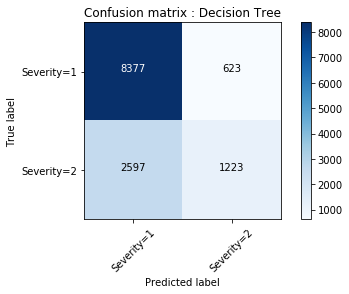

In [111]:
cnf_matrix_tree = confusion_matrix(y_test, y_predict_tree, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix_tree(cnf_matrix_tree, classes=['Severity=1','Severity=2'],normalize= False,  title='Confusion matrix : Decision Tree')

##   

#### Plotting Confusion Matrix for SVM model

Confusion matrix, without normalization
[[8710  290]
 [2959  861]]


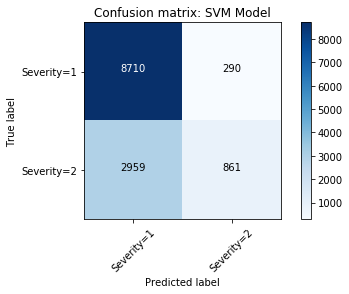

In [112]:
cnf_matrix_svm = confusion_matrix(y_test, y_predict_svm, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix_svm(cnf_matrix_svm, classes=['Severity=1','Severity=2'],normalize= False,  title='Confusion matrix: SVM Model')

###  

### Results 

#### We choose Decision Tree model for predicting the Accident Severity on Seattle Raods for the following reasons :

From the Confusion Matrix we can see that Decision Tree model can predict Severity 2 Accidents more accurately (almost by 50%) than SVM Tree model.
There is not much difference in predicting Seveity 1 Accidents between the two models.
Since Decision Tree model also has higher Jaccard score and F1 -Score we choose Decision Tree model for predicting the Accident Severity on Seattle Raods.